<a href="https://colab.research.google.com/github/MohsenJadidi/ISLR/blob/master/Assignment1/Q5.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Assignment 1 - Q5 (Regression model)**
Statistical Learning Theory Course - Fall 2020 @ AUT

Author: MohammadMohsen Jadidi | email : mohsenjadidi@aut.ac.ir

# Part A

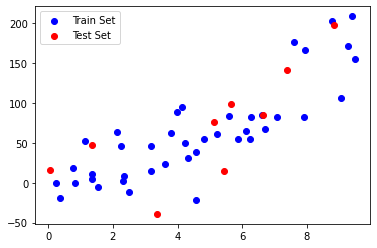

In [ ]:
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt

X_train = [3.19,9.26,9.38,8.77,7.91,3.79,3.18,7.61,2.36,6.26,6.62,1.53,6.25,
           7.93,7.07,4.58,4.14,2.14,9.04,4.56,3.99,6.71,2.51,0.84,6.13,5.22,
           0.25,3.60,1.36,5.59,4.81,1.14,0.36,2.31,1.37,5.86,4.23,9.48,2.26,
           0.77,4.33]
Y_train = [46.40,172.16,209.00,203.31,82.88,62.57,14.38,177.00,8.01,82.35,
           84.84,-5.59,54.96,167.17,83.09,-21.63,94.64,63.97,106.57,38.99,
           88.26,66.99,-11.12,-0.44,65.08,61.47,-0.61,23.85,10.55,83.69,54.35,
           51.82,-18.63,1.98,4.90,55.44,50.09,155.66,45.57,18.12,30.58]
X_test = [5.65,0.07,8.84,5.14,6.65,1.35,5.45,7.39,3.35]
Y_test = [98.52,16.09,198.45,75.90,85.11,47.64,14.76,141.03,-39.13]

fig = plt.figure(num=1)
ax = fig.add_subplot(1, 1, 1)
scatter1 = ax.scatter(x=X_train, y=Y_train, color='b', alpha=1, marker='o')
scatter2 = ax.scatter(x=X_test, y=Y_test, color='r', alpha=1, marker='o')
ax.legend(['Train Set', 'Test Set'])

# Part B

Interception:  -21.73078292905422
Coefficients:  [18.30320685]
Mean squared error: 2023.3121088887128
Coefficient of determination, R^2: 0.5556465885794163


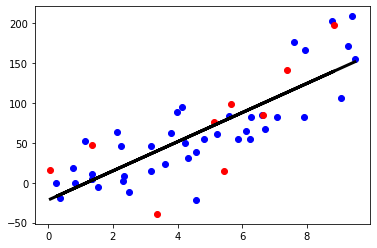

In [ ]:
from sklearn.metrics import mean_squared_error, r2_score
import numpy as np

X_train = np.array(X_train).reshape(-1, 1)
X_test = np.array(X_test).reshape(-1, 1)
X_temp = [X_test.min(), X_test.max(), X_train.min(), X_train.max()]
X_temp = np.array(X_temp).reshape(-1, 1)

regressor = LinearRegression(fit_intercept=True)
regressor.fit(X_train, Y_train)

Y_pred = regressor.predict(X_test)

mse = mean_squared_error(Y_test, Y_pred)
R2 = r2_score(Y_test, Y_pred)

print('Interception: ', regressor.intercept_)
print('Coefficients: ', regressor.coef_)
print(f'Mean squared error: {mse}')
print(f'Coefficient of determination, R^2: {R2}')

Y_pred_temp = regressor.predict(X_temp)

fig = plt.figure(num=2)
ax = fig.add_subplot(1, 1, 1)
scatter1 = ax.scatter(x=X_train, y=Y_train, color='b', alpha=1, marker='o')
scatter2 = ax.scatter(x=X_test, y=Y_test, color='r', alpha=1, marker='o')
line1, = ax.plot(X_temp, Y_pred_temp, linewidth=3, color='k')

# Part C
Fitting Polynomial Regression

Mean squared error: 2023.3121088887128
Mean squared error: 1398.881758014395
Mean squared error: 1511.49535975642
Mean squared error: 1484.6344299956752
Mean squared error: 1457.2597619229034
Mean squared error: 1450.403596629217
Mean squared error: 1790.7074660274654
Mean squared error: 1582.275790023932
Mean squared error: 1526.2228130322803
Mean squared error: 1420.898449538048


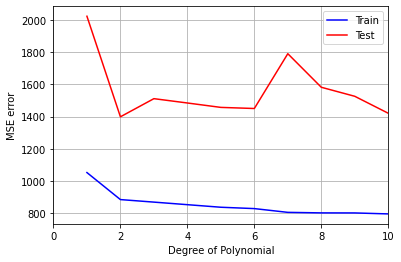

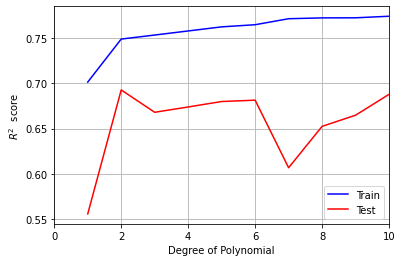

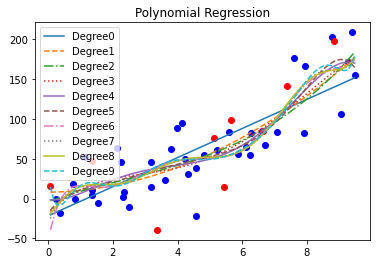

In [ ]:
p_max = 10
mseTrainList = []
R2TrainList = []
mseTestList = []
R2TestList = []
coffList = np.zeros(shape=(p_max, p_max+1))
for i in range(p_max):
    p = i+1 # Degree of Poly = 1, 2, ..., p_max
    X_train_Poly = np.zeros(shape = (X_train.shape[0],p))
    X_test_Poly = np.zeros(shape = (X_test.shape[0],p))
    X_temp_Poly = np.zeros(shape = (X_temp.shape[0],p))
    for j in range(p):
        X_train_Poly[:,j] = (np.power(X_train,j+1)).flatten()
        X_test_Poly[:,j] = (np.power(X_test,j+1)).flatten()
        X_temp_Poly[:,j] = (np.power(X_temp,j+1)).flatten()
        
    regressor = LinearRegression(fit_intercept=True)
    regressor.fit(X_train_Poly, Y_train)
    
    # Error in Training Set
    Y_pred = regressor.predict(X_test_Poly)
    mse = mean_squared_error(Y_test, Y_pred)
    R2 = r2_score(Y_test, Y_pred)
    
    mseTestList.append(mse)
    R2TestList.append(R2)
    coffList[i,0] = regressor.intercept_
    coffList[i,1:p+1] = regressor.coef_
    
    # print('Interception: ', regressor.intercept_)
    # print('Coefficients: ', regressor.coef_)
    print(f'Mean squared error: {mse}')
    # print(f'Coefficient of determination, R^2: {R2}')
    
    # Error in Test Set
    Y_pred = regressor.predict(X_train_Poly)
    mse = mean_squared_error(Y_train, Y_pred)
    R2 = r2_score(Y_train, Y_pred)
    mseTrainList.append(mse)
    R2TrainList.append(R2)
    
    
fig = plt.figure(num=3)
ax = fig.add_subplot(1, 1, 1)
p = [i+1 for i in range(p_max)]
line1, line2 = ax.plot(p, mseTrainList, 'b', p, mseTestList, 'r')
ax.set_xlabel('Degree of Polynomial')
ax.set_ylabel('MSE error')
ax.legend(['Train', 'Test'])
ax.set_xlim([0,p_max])
ax.grid(b= True, which='both')

fig = plt.figure(num=4)
ax = fig.add_subplot(1, 1, 1)
p = [i+1 for i in range(p_max)]
line1, line2 = ax.plot(p, R2TrainList, 'b', p, R2TestList, 'r')
ax.set_xlabel('Degree of Polynomial')
ax.set_ylabel(r'$R^2$  score')
ax.legend(['Train', 'Test'])
ax.set_xlim([0,p_max])
ax.grid(b= True, which='both')


fig = plt.figure(num=5)
ax = fig.add_subplot(1, 1, 1)
x = np.linspace(X_temp.min(), X_temp.max(), 100)
styles = ['-', '--', '-.', ':']
for i in range(coffList.shape[0]):
    y = np.zeros_like(x)
    for j in range(i+2) :
        y = y + coffList[i,j]*np.power(x,j)
    line1, = ax.plot(x, y, linestyle=styles[i%4])

ax.legend([ 'Degree'+str(i) for i in range(coffList.shape[0]) ])
ax.set_title('Polynomial Regression')
scatter1 = ax.scatter(x=X_train, y=Y_train, color='b', alpha=1, marker='o')
scatter2 = ax.scatter(x=X_test, y=Y_test, color='r', alpha=1, marker='o')

Fitting Polynomial and e^x Regression

Mean squared error: 1749.2989997771274
Mean squared error: 1437.8955435892624
Mean squared error: 1450.3701971160249
Mean squared error: 1433.7997907445845
Mean squared error: 1438.7967292239507


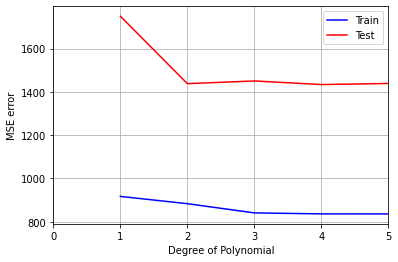

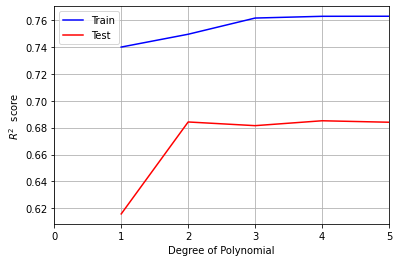

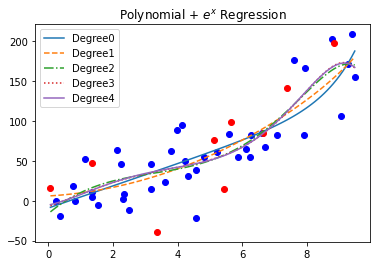

In [ ]:
p_max = 5
mseTrainListe = []
R2TrainListe = []
mseTestListe = []
R2TestListe = []
coffListe = np.zeros(shape=(p_max, p_max+2))
for i in range(p_max):
    p = i+1 # Degree of Poly = 1, 2, ..., p_max
    X_train_Poly = np.zeros(shape = (X_train.shape[0],p+1))
    X_test_Poly = np.zeros(shape = (X_test.shape[0],p+1))
    X_temp_Poly = np.zeros(shape = (X_temp.shape[0],p+1))
    for j in range(p):
        X_train_Poly[:,j] = (np.power(X_train,j+1)).flatten()
        X_test_Poly[:,j] = (np.power(X_test,j+1)).flatten()
        X_temp_Poly[:,j] = (np.power(X_temp,j+1)).flatten()
    
    X_train_Poly[:,j+1] = (np.exp(X_train)).flatten()
    X_test_Poly[:,j+1] = (np.exp(X_test)).flatten()
    X_temp_Poly[:,j+1] = (np.exp(X_temp)).flatten()
        
    regressor = LinearRegression(fit_intercept=True)
    regressor.fit(X_train_Poly, Y_train)
    
    # Error in Training Set
    Y_pred = regressor.predict(X_test_Poly)
    mse = mean_squared_error(Y_test, Y_pred)
    R2 = r2_score(Y_test, Y_pred)
    
    mseTestListe.append(mse)
    R2TestListe.append(R2)
    coffListe[i,0] = regressor.intercept_
    coffListe[i,1:p+2] = regressor.coef_
    
    # print('Interception: ', regressor.intercept_)
    # print('Coefficients: ', regressor.coef_)
    print(f'Mean squared error: {mse}')
    # print(f'Coefficient of determination, R^2: {R2}')
    
    # Error in Test Set
    Y_pred = regressor.predict(X_train_Poly)
    mse = mean_squared_error(Y_train, Y_pred)
    R2 = r2_score(Y_train, Y_pred)
    mseTrainListe.append(mse)
    R2TrainListe.append(R2)
    
    
fig = plt.figure(num=6)
ax = fig.add_subplot(1, 1, 1)
p = [i+1 for i in range(p_max)]
line1, line2 = ax.plot(p, mseTrainListe, 'b', p, mseTestListe, 'r')
ax.set_xlabel('Degree of Polynomial')
ax.set_ylabel('MSE error')
ax.legend(['Train', 'Test'])
ax.set_xlim([0,p_max])
ax.grid(b= True, which='both')

fig = plt.figure(num=7)
ax = fig.add_subplot(1, 1, 1)
p = [i+1 for i in range(p_max)]
line1, line2 = ax.plot(p, R2TrainListe, 'b', p, R2TestListe, 'r')
ax.set_xlabel('Degree of Polynomial')
ax.set_ylabel(r'$R^2$  score')
ax.legend(['Train', 'Test'])
ax.set_xlim([0,p_max])
ax.grid(b= True, which='both')

fig = plt.figure(num=8)
ax = fig.add_subplot(1, 1, 1)
x = np.linspace(X_temp.min(), X_temp.max(), 100)
styles = ['-', '--', '-.', ':']
for i in range(coffListe.shape[0]):
    y = np.zeros_like(x)
    for j in range(i+2) :
        y = y + coffListe[i,j]*np.power(x,j)
    y = y + coffListe[i,j+1]*np.exp(x)    
    line1, = ax.plot(x, y, linestyle=styles[i%4])

ax.legend([ 'Degree'+str(i) for i in range(coffListe.shape[0]) ])
ax.set_title(r'Polynomial + $e^x$ Regression')
scatter1 = ax.scatter(x=X_train, y=Y_train, color='b', alpha=1, marker='o')
scatter2 = ax.scatter(x=X_test, y=Y_test, color='r', alpha=1, marker='o')


 Fitting Polynomial and sin(x) Regression

Mean squared error: 1667.8741296478963
Mean squared error: 1365.4457337271149
Mean squared error: 1494.379764855494
Mean squared error: 1490.6084591191097
Mean squared error: 1435.3937724965808


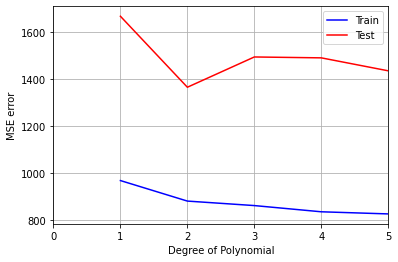

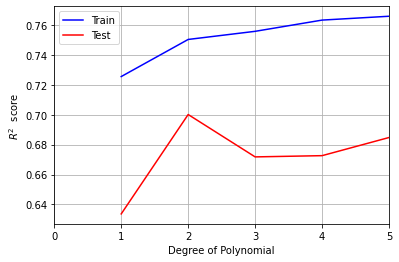

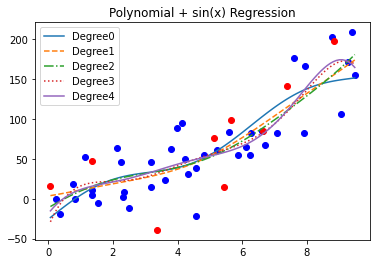

In [ ]:
p_max = 5
mseTrainListsin = []
R2TrainListsin = []
mseTestListsin = []
R2TestListsin = []
coffListsin = np.zeros(shape=(p_max, p_max+2))
for i in range(p_max):
    p = i+1 # Degree of Poly = 1, 2, ..., p_max
    X_train_Poly = np.zeros(shape = (X_train.shape[0],p+1))
    X_test_Poly = np.zeros(shape = (X_test.shape[0],p+1))
    X_temp_Poly = np.zeros(shape = (X_temp.shape[0],p+1))
    for j in range(p):
        X_train_Poly[:,j] = (np.power(X_train,j+1)).flatten()
        X_test_Poly[:,j] = (np.power(X_test,j+1)).flatten()
        X_temp_Poly[:,j] = (np.power(X_temp,j+1)).flatten()
    
    X_train_Poly[:,j+1] = (np.sin(X_train)).flatten()
    X_test_Poly[:,j+1] = (np.sin(X_test)).flatten()
    X_temp_Poly[:,j+1] = (np.sin(X_temp)).flatten()
        
    regressor = LinearRegression(fit_intercept=True)
    regressor.fit(X_train_Poly, Y_train)
    
    # Error in Training Set
    Y_pred = regressor.predict(X_test_Poly)
    mse = mean_squared_error(Y_test, Y_pred)
    R2 = r2_score(Y_test, Y_pred)
    
    mseTestListsin.append(mse)
    R2TestListsin.append(R2)
    coffListsin[i,0] = regressor.intercept_
    coffListsin[i,1:p+2] = regressor.coef_
    
    # print('Interception: ', regressor.intercept_)
    # print('Coefficients: ', regressor.coef_)
    print(f'Mean squared error: {mse}')
    # print(f'Coefficient of determination, R^2: {R2}')
    
    # Error in Test Set
    Y_pred = regressor.predict(X_train_Poly)
    mse = mean_squared_error(Y_train, Y_pred)
    R2 = r2_score(Y_train, Y_pred)
    mseTrainListsin.append(mse)
    R2TrainListsin.append(R2)

fig = plt.figure(num=9)
ax = fig.add_subplot(1, 1, 1)
p = [i+1 for i in range(p_max)]
line1, line2 = ax.plot(p, mseTrainListsin, 'b', p, mseTestListsin, 'r')
ax.set_xlabel('Degree of Polynomial')
ax.set_ylabel('MSE error')
ax.legend(['Train', 'Test'])
ax.set_xlim([0,p_max])
ax.grid(b= True, which='both')

fig = plt.figure(num=10)
ax = fig.add_subplot(1, 1, 1)
p = [i+1 for i in range(p_max)]
line1, line2 = ax.plot(p, R2TrainListsin, 'b', p, R2TestListsin, 'r')
ax.set_xlabel('Degree of Polynomial')
ax.set_ylabel(r'$R^2$  score')
ax.legend(['Train', 'Test'])
ax.set_xlim([0,p_max])
ax.grid(b= True, which='both')

fig = plt.figure(num=11)
ax = fig.add_subplot(1, 1, 1)
x = np.linspace(X_temp.min(), X_temp.max(), 100)
styles = ['-', '--', '-.', ':']
for i in range(coffListsin.shape[0]):
    y = np.zeros_like(x)
    for j in range(i+2) :
        y = y + coffListsin[i,j]*np.power(x,j)
    y = y + coffListsin[i,j+1]*np.sin(x)    
    line1, = ax.plot(x, y, linestyle=styles[i%4])

ax.legend([ 'Degree'+str(i) for i in range(coffListsin.shape[0]) ])
ax.set_title('Polynomial + sin(x) Regression')
scatter1 = ax.scatter(x=X_train, y=Y_train, color='b', alpha=1, marker='o')
scatter2 = ax.scatter(x=X_test, y=Y_test, color='r', alpha=1, marker='o')

 Fitting Polynomial and e^x + sin(x) Regression

Mean squared error: 1543.5618575371293
Mean squared error: 1448.4506547994854
Mean squared error: 1428.0267208567493
Mean squared error: 1440.2320568100247
Mean squared error: 1526.371706635475


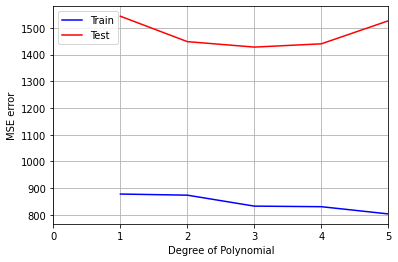

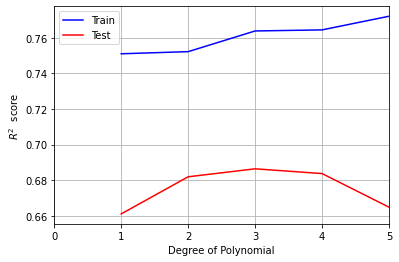

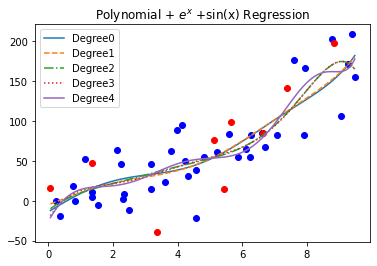

In [ ]:
p_max = 5
mseTrainListesin = []
R2TrainListesin = []
mseTestListesin = []
R2TestListesin = []
coffListesin = np.zeros(shape=(p_max, p_max+3))
for i in range(p_max):
    p = i+1 # Degree of Poly = 1, 2, ..., p_max
    X_train_Poly = np.zeros(shape = (X_train.shape[0],p+2))
    X_test_Poly = np.zeros(shape = (X_test.shape[0],p+2))
    X_temp_Poly = np.zeros(shape = (X_temp.shape[0],p+2))
    for j in range(p):
        X_train_Poly[:,j] = (np.power(X_train,j+1)).flatten()
        X_test_Poly[:,j] = (np.power(X_test,j+1)).flatten()
        X_temp_Poly[:,j] = (np.power(X_temp,j+1)).flatten()
    
    X_train_Poly[:,j+1] = (np.exp(X_train)).flatten()
    X_test_Poly[:,j+1] = (np.exp(X_test)).flatten()
    X_temp_Poly[:,j+1] = (np.exp(X_temp)).flatten()
    
    X_train_Poly[:,j+2] = (np.sin(X_train)).flatten()
    X_test_Poly[:,j+2] = (np.sin(X_test)).flatten()
    X_temp_Poly[:,j+2] = (np.sin(X_temp)).flatten()
        
    regressor = LinearRegression(fit_intercept=True)
    regressor.fit(X_train_Poly, Y_train)
    
    # Error in Training Set
    Y_pred = regressor.predict(X_test_Poly)
    mse = mean_squared_error(Y_test, Y_pred)
    R2 = r2_score(Y_test, Y_pred)
    
    mseTestListesin.append(mse)
    R2TestListesin.append(R2)
    coffListesin[i,0] = regressor.intercept_
    coffListesin[i,1:p+3] = regressor.coef_
    
    # print('Interception: ', regressor.intercept_)
    # print('Coefficients: ', regressor.coef_)
    print(f'Mean squared error: {mse}')
    # print(f'Coefficient of determination, R^2: {R2}')
    
    # Error in Test Set
    Y_pred = regressor.predict(X_train_Poly)
    mse = mean_squared_error(Y_train, Y_pred)
    R2 = r2_score(Y_train, Y_pred)
    mseTrainListesin.append(mse)
    R2TrainListesin.append(R2)

fig = plt.figure(num=12)
ax = fig.add_subplot(1, 1, 1)
p = [i+1 for i in range(p_max)]
line1, line2 = ax.plot(p, mseTrainListesin, 'b', p, mseTestListesin, 'r')
ax.set_xlabel('Degree of Polynomial')
ax.set_ylabel('MSE error')
ax.legend(['Train', 'Test'])
ax.set_xlim([0,p_max])
ax.grid(b= True, which='both')

fig = plt.figure(num=13)
ax = fig.add_subplot(1, 1, 1)
p = [i+1 for i in range(p_max)]
line1, line2 = ax.plot(p, R2TrainListesin, 'b', p, R2TestListesin, 'r')
ax.set_xlabel('Degree of Polynomial')
ax.set_ylabel(r'$R^2$  score')
ax.legend(['Train', 'Test'])
ax.set_xlim([0,p_max])
ax.grid(b= True, which='both')

fig = plt.figure(num=14)
ax = fig.add_subplot(1, 1, 1)
x = np.linspace(X_temp.min(), X_temp.max(), 100)
styles = ['-', '--', '-.', ':']
for i in range(coffListesin.shape[0]):
    y = np.zeros_like(x)
    for j in range(i+2) :
        y = y + coffListesin[i,j]*np.power(x,j)
    y = y + coffListesin[i,j+1]*np.exp(x)
    y = y + coffListesin[i,j+2]*np.sin(x)    
    line1, = ax.plot(x, y, linestyle=styles[i%4])

ax.legend([ 'Degree'+str(i) for i in range(coffListesin.shape[0]) ])
ax.set_title(r'Polynomial + $e^x$ +sin(x) Regression')
scatter1 = ax.scatter(x=X_train, y=Y_train, color='b', alpha=1, marker='o')
scatter2 = ax.scatter(x=X_test, y=Y_test, color='r', alpha=1, marker='o')
